In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [15]:
np.random.seed(42)

n_participants = 30


no_music =np.random.normal(loc=300, scale=30, size=n_participants) 
fast_music =np.random.normal(loc=280, scale=25, size=n_participants)
slow_music =np.random.normal(loc=320, scale=35, size=n_participants)

data= pd.DataFrame({
    "Reaction_Time": np.concatenate([no_music, fast_music, slow_music]),
    "Condition": (["No Music"] * n_participants+
                  ["Fast Music"] *n_participants+
                  ["Slow Music"] *n_participants)

})

print("Head of Dataset:\n", data.head())

Head of Dataset:
    Reaction_Time Condition
0     314.901425  No Music
1     295.852071  No Music
2     319.430656  No Music
3     345.690896  No Music
4     292.975399  No Music


In [17]:
f_stat, p_val =f_oneway(no_music, fast_music, slow_music)
print("\nANOVA Results:")
print("F-statistic=", round(f_stat,3))
print("p-value=", round(p_val,5))


ANOVA Results:
F-statistic= 17.407
p-value= 0.0


/var/folders/wx/2q4rvncx15d3fgdkqqnfxsfm0000gn/T/ipykernel_15571/4253452829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Reaction_Time", data=data, palette="Set2")


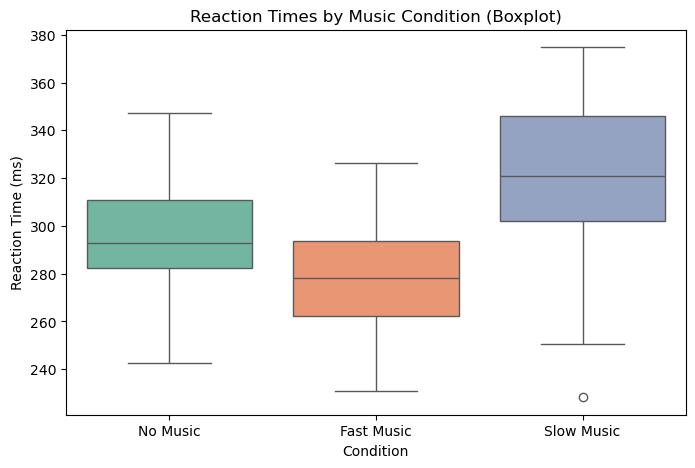

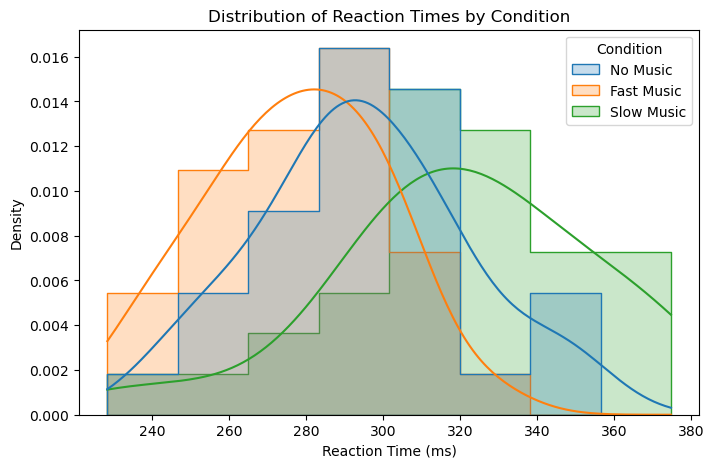


 + Significant effect of music condition on reaction times (p <0.05).

 - Significant effect of music condition on reaction times (p ≥ 0.05).


In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Condition", y="Reaction_Time", data=data, palette="Set2")
plt.title("Reaction Times by Music Condition (Boxplot)")
plt.ylabel("Reaction Time (ms)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=data, x="Reaction_Time", hue="Condition", kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribution of Reaction Times by Condition")
plt.xlabel("Reaction Time (ms)")
plt.show()

if p_val < 0.05:
    print("\n + Significant effect of music condition on reaction times (p <0.05).")
    print("\n - Significant effect of music condition on reaction times (p ≥ 0.05).")
            